<a href="https://colab.research.google.com/github/yjcgayao/Gayao/blob/main/DM3_CC19_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Sample dataset
X = np.array([800, 1200, 1500, 1800, 2200]).reshape(-1,1)  # Independent variable (square footage)
y = np.array([150000, 180000, 220000, 250000, 280000])  # Dependent variable (price)

# Train Model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict([[2000]])  # Predict price for 2000 sqft house
print("Predicted Price:", y_pred[0])

Predicted Price: 264275.8620689655


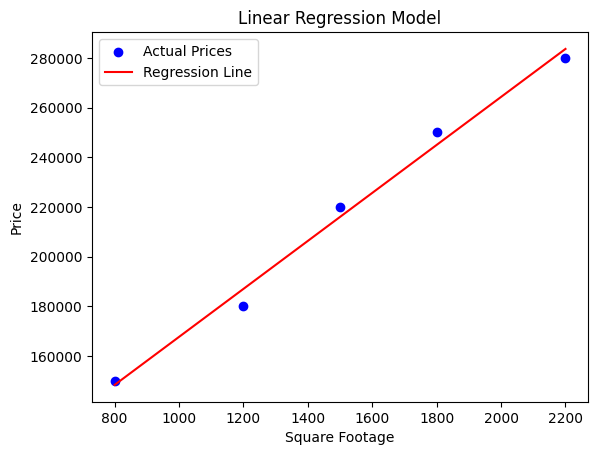

In [ ]:
# prompt: The graph of the 1st line of code

import matplotlib.pyplot as plt

# ... (Your existing code)

# Plot the data points
plt.scatter(X, y, color='blue', label='Actual Prices')

# Plot the regression line
plt.plot(X, model.predict(X), color='red', label='Regression Line')

# Add labels and title
plt.xlabel("Square Footage")
plt.ylabel("Price")
plt.title("Linear Regression Model")
plt.legend()

# Show the plot
plt.show()


Multiple Linear Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Sample dataset
data = {
    'SquareFootage': [800, 1200, 1500, 1800, 2200],
    'Bedrooms': [2, 3, 3, 4, 4],
    'Price': [150000, 180000, 220000, 250000, 280000]
}
df = pd.DataFrame(data)

# Define independent and dependent variables
X = df[['SquareFootage', 'Bedrooms']]
y = df['Price']

# Split data and train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
print("Predicted Prices:", y_pred)

Predicted Prices: [192916.66666667]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


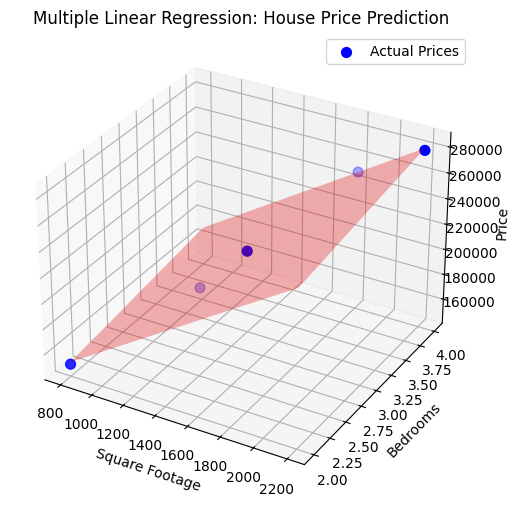

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

# Sample dataset
data = {
    'SquareFootage': [800, 1200, 1500, 1800, 2200],
    'Bedrooms': [2, 3, 3, 4, 4],
    'Price': [150000, 180000, 220000, 250000, 280000]
}
df = pd.DataFrame(data)

# Define independent and dependent variables
X = df[['SquareFootage', 'Bedrooms']]
y = df['Price']

# Split data and train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Predict values
y_pred = model.predict(X_test)

# Generate predictions for all data points to plot regression plane
y_pred_full = model.predict(X)

# Create a 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of actual data points
ax.scatter(X['SquareFootage'], X['Bedrooms'], y, color='blue', label='Actual Prices', s=50)

# Create a meshgrid for SquareFootage and Bedrooms
sqft_range = np.linspace(X['SquareFootage'].min(), X['SquareFootage'].max(), 10)
bedrooms_range = np.linspace(X['Bedrooms'].min(), X['Bedrooms'].max(), 10)
sqft_mesh, bedrooms_mesh = np.meshgrid(sqft_range, bedrooms_range)
X_grid = np.c_[sqft_mesh.ravel(), bedrooms_mesh.ravel()]

# Predict prices for the grid
y_grid_pred = model.predict(X_grid).reshape(sqft_mesh.shape)

# Plot the regression plane
ax.plot_surface(sqft_mesh, bedrooms_mesh, y_grid_pred, color='red', alpha=0.3)

# Labels and title
ax.set_xlabel("Square Footage")
ax.set_ylabel("Bedrooms")
ax.set_zlabel("Price")
ax.set_title("Multiple Linear Regression: House Price Prediction")
ax.legend()

# Show the plot
plt.show()

Polynomial Regression

Predicted COVID-19 cases on Day 11: 17174


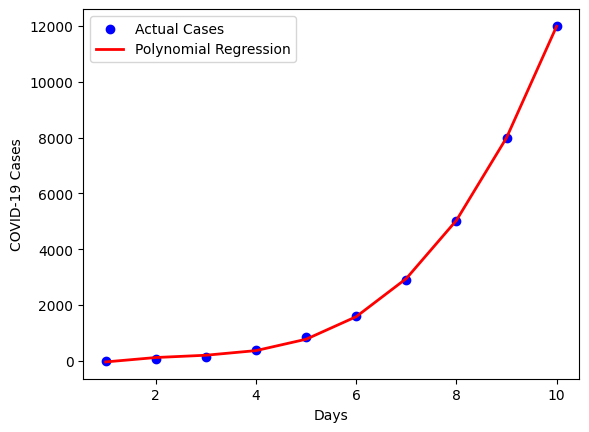

In [ ]:
# Step 1: Import Required Libraries
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
from sklearn.preprocessing import PolynomialFeatures  # To generate polynomial features
from sklearn.linear_model import LinearRegression  # Linear model for polynomial regression

# Step 2: Create a Dataset (Days vs. COVID-19 Cases)
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y = np.array([10, 50, 150, 400, 850, 1600, 2900, 5000, 8000, 12000])

# Step 3: Transform Features to Polynomial Form (Degree = 3)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Step 4: Train the Polynomial Regression Model
model = LinearRegression()
model.fit(X_poly, y)

# Step 5: Predict Cases for Day 11
X_test = np.array([11]).reshape(-1, 1)
X_test_poly = poly.transform(X_test)
y_pred = model.predict(X_test_poly)

print(f"Predicted COVID-19 cases on Day 11: {int(y_pred[0])}")

# Step 6: Plot the Data and Regression Curve
plt.scatter(X, y, color='blue', label="Actual Cases")
plt.plot(X, model.predict(X_poly), color='red', linewidth=2, label="Polynomial Regression")
plt.xlabel("Days")
plt.ylabel("COVID-19 Cases")
plt.legend()
plt.show()